In [1]:
import pandas as pd
import os

from libs.data_loader import DataLoader
from libs.optimizer import RoadNetworkOptimizer
from libs.visualizer import NetworkVisualizer

### **LOAD DATA**

In [2]:
CSV_PATH = 'dataset/dataset_jalan.csv'

try:
    print(f"Loading data from {CSV_PATH}...")
    
    village_names, road_data_clean = DataLoader.load_road_data(CSV_PATH)

    print("\n===== Preview Dataset =====")
    df_preview = pd.read_csv(CSV_PATH)
    display(df_preview.head(10))
    
    print(f"\nData Loaded Successfully!")
    print(f"   - Total Desa : {len(village_names)}")
    print(f"   - Total Rute : {len(road_data_clean)}")

except Exception as e:
    print(f"Error Loading Data: {e}")

Loading data from dataset/dataset_jalan.csv...
DataLoader: Berhasil memuat 7 desa dan 12 rute jalan.

===== Preview Dataset =====


,Asal,Tujuan,Jarak (Km),Biaya (Juta Rp),Benefit (Skor 1-100)
0,Desa Cahaya,Desa Petir,12,100,90
1,Desa Cahaya,Desa Air,8,80,50
2,Desa Petir,Desa Bumi,15,120,85
3,Desa Petir,Desa Api,22,200,40
4,Desa Air,Desa Bumi,6,60,70
5,Desa Bumi,Desa Kayu,18,150,80
6,Desa Api,Desa Kayu,10,90,60
7,Desa Kayu,Desa Langit,14,110,50
8,Desa Cahaya,Desa Api,35,300,20
9,Desa Air,Desa Langit,20,180,95



Data Loaded Successfully!
   - Total Desa : 7
   - Total Rute : 12


### **MEMBANGUN TOPOLOGY GRAPH**

In [3]:
project_eco = RoadNetworkOptimizer(village_names, optimization_mode='ratio')


for road in road_data_clean:
    project_eco.register_road_proposal(
        u=road['u'],
        v=road['v'],
        distance_km=road['distance'],
        cost_rp=road['cost'],
        benefit_score=road['benefit']
    )

print("Topology Graph berhasil dibangun.")

Topology Graph berhasil dibangun.


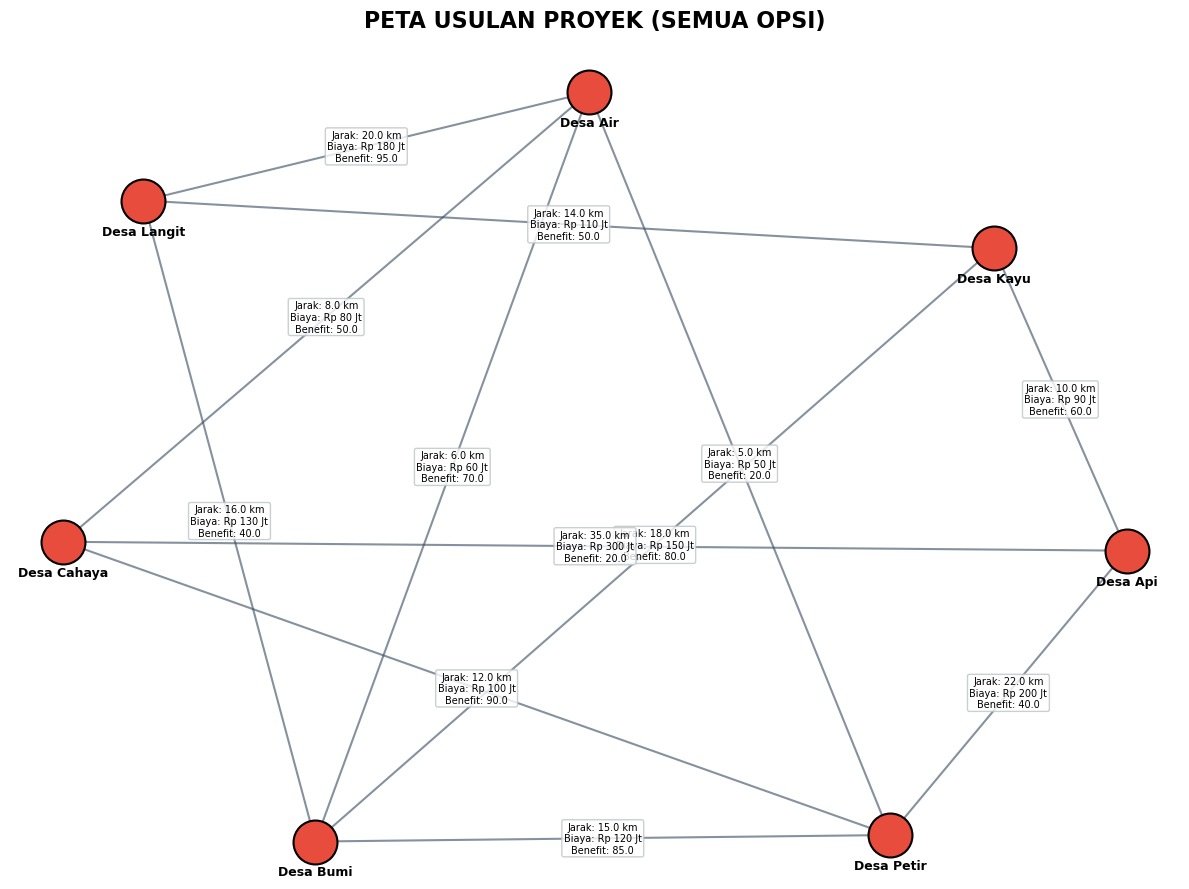

In [4]:
NetworkVisualizer.initial_graph(
    project_eco, 
    title="PETA USULAN PROYEK (SEMUA OPSI)",
    title_weight='bold',
    node_color='#e74c3c', 
    currency_code="Rp"
)

### **MENJALANKAN ALGORITMA KRUSKAL(OPTIMASI) SERTA VISUALIASI GRAPH (MST)**

In [5]:
print("Eksekusi Kruskal Algorithm...")
mst_eco, stats_eco = project_eco.optimize_network_budget()
print("Optimization Complete.")

Eksekusi Kruskal Algorithm...
Optimization Complete.



LAPORAN KEPUTUSAN PEMBANGUNAN JALAN DESA (MODE: RATIO)
Total Usulan Masuk   : 12 ruas
Total Jalan Dibangun : 6 ruas
Total Panjang Jalan  : 81.0 km
Total Anggaran       : Rp 700 Jt
Total Dampak Ekonomi : 480.0 Poin
--------------------------------------------------------------------------------
Rute Terpilih                  | Jarak      | Biaya        | Benefit  | Ratio (C/B) 
--------------------------------------------------------------------------------
Desa Air <--> Desa Bumi        | 6.0 km     | Rp 60 Jt     | 70.0     | 0.86
Desa Cahaya <--> Desa Petir    | 12.0 km    | Rp 100 Jt    | 90.0     | 1.11
Desa Petir <--> Desa Bumi      | 15.0 km    | Rp 120 Jt    | 85.0     | 1.41
Desa Api <--> Desa Kayu        | 10.0 km    | Rp 90 Jt     | 60.0     | 1.50
Desa Bumi <--> Desa Kayu       | 18.0 km    | Rp 150 Jt    | 80.0     | 1.88
Desa Air <--> Desa Langit      | 20.0 km    | Rp 180 Jt    | 95.0     | 1.89
----------------------------------------------------------------------------

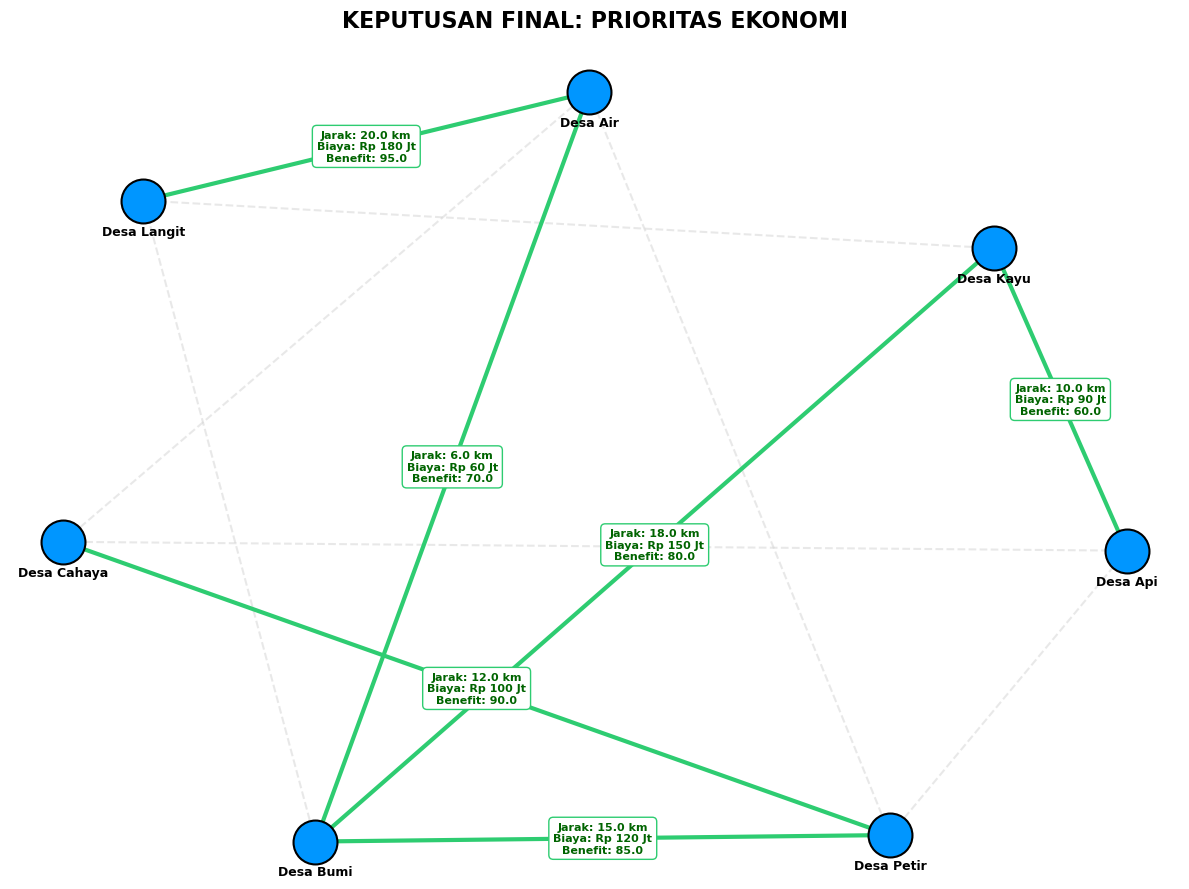

In [6]:
NetworkVisualizer.print_report(project_eco, mst_eco, stats_eco, currency_code="Rp")

NetworkVisualizer.solution_graph(
    project_eco, 
    mst_eco, 
    title="KEPUTUSAN FINAL: PRIORITAS EKONOMI",
    title_weight='heavy',
    node_color='#0096FF',     
    mst_edge_color='#2ecc71', 
    currency_code="Rp"
)

### **PERBANDINGAN DENGAN HANYA MENGHITUNG JARAK TERPENDEK**


PERBANDINGAN STRATEGI KEPUTUSAN
MODE EKONOMI (RATIO)  -> Total Biaya: Rp 0.7 M | Benefit: 480.0
MODE JARAK (DISTANCE) -> Total Biaya: Rp 0.52 M | Benefit: 290.0
---------------------------------------------------------------------------


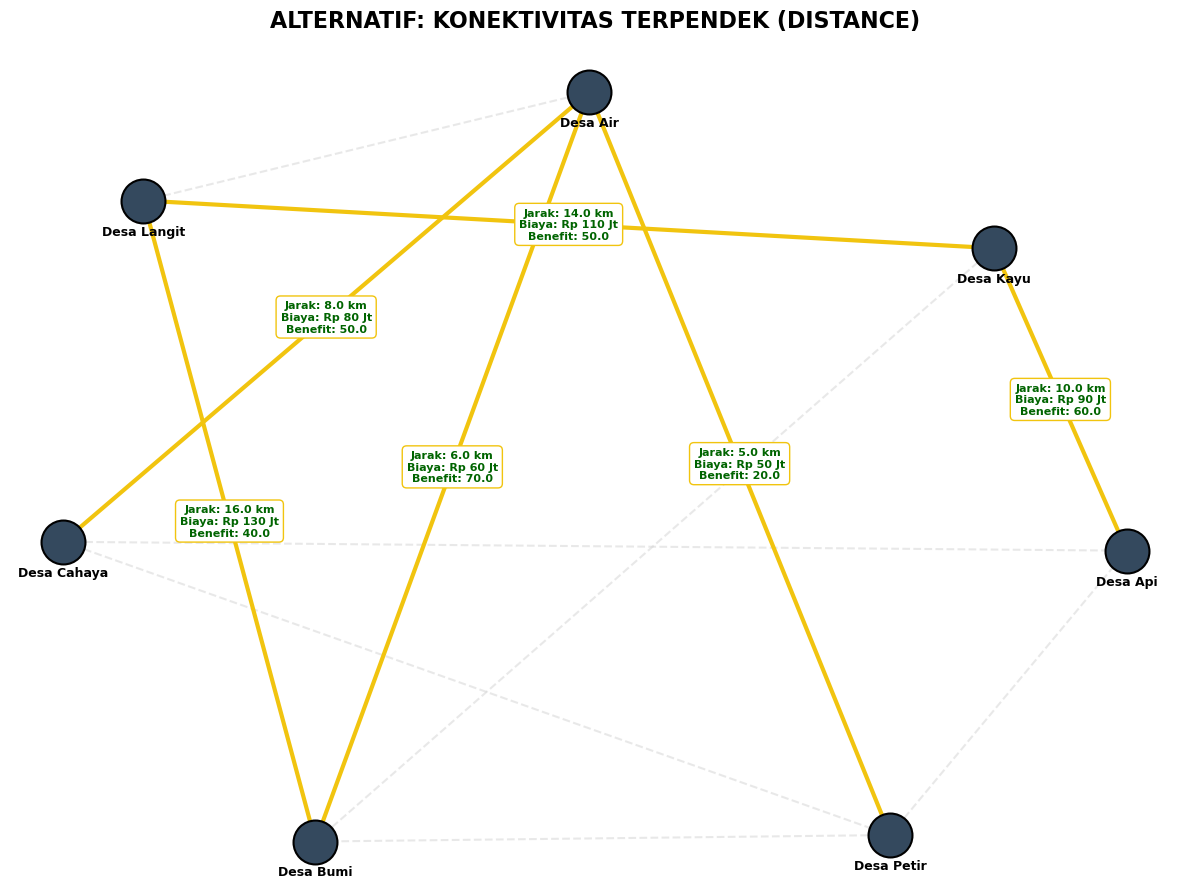

In [7]:
project_dist = RoadNetworkOptimizer(village_names, optimization_mode='distance')


for road in road_data_clean:
    project_dist.register_road_proposal(
        u=road['u'], v=road['v'], 
        distance_km=road['distance'], cost_rp=road['cost'], benefit_score=road['benefit']
    )

mst_dist, stats_dist = project_dist.optimize_network_budget()

print("\n" + "="*75)
print("PERBANDINGAN STRATEGI KEPUTUSAN")
print("="*75)
print(f"MODE EKONOMI (RATIO)  -> Total Biaya: Rp {stats_eco['total_cost']/1000} M | Benefit: {stats_eco['total_benefit']}")
print(f"MODE JARAK (DISTANCE) -> Total Biaya: Rp {stats_dist['total_cost']/1000} M | Benefit: {stats_dist['total_benefit']}")
print("-" * 75)


NetworkVisualizer.solution_graph(
    project_dist, 
    mst_dist, 
    title="ALTERNATIF: KONEKTIVITAS TERPENDEK (DISTANCE)",
    node_color='#34495e',     
    mst_edge_color='#f1c40f', 
    currency_code="Rp"
)